PowerTransformer --- 3:21 min
===

* 3:21 min | Última modificación: Octubre 7, 2021 | [YouTube](https://youtu.be/RbvNnHazhQM)

Aplica transformaciones de potencias para llevar la distribución de los datos a lo más cercana posibles a una distribución normal

**Transformación de Yeo-Johnson**

$$
x_i^{(\lambda)} = 
\begin{cases}
[(x_i+1)^\lambda - 1] / \lambda & \text{Si } \lambda \ne 0, \; x_i \ge 0, \\
\text{ln}(x_i + 1) & \text{Si } \lambda = 0, \; x_i \ge 0, \\
-[(-x_i+1)^{2 - \lambda} - 1] / (2 - \lambda) & \text{Si } \lambda \ne 2, \; x_i < 0, \\
-\text{ln}(-x_i + 1) & \text{Si } \lambda = 2, \; x_i < 0, \\
\end{cases}
$$

**Transformación de Box-Cox**

$$
x_i^{(\lambda)} =
\begin{cases}
\frac{x_i^\lambda - 1}{\lambda} & \text{Si } \lambda \ne 0, \\
\text{ln}(x_i) & \text{Si } \lambda = 0
\end{cases}
$$

In [1]:
import seaborn as sns

penguins = sns.load_dataset("penguins")

data = penguins[["bill_length_mm"]]
data = data.rename(columns={"bill_length_mm": "original"})

In [2]:
from sklearn.preprocessing import PowerTransformer

powerTransformer_boxcox = PowerTransformer(
    # -------------------------------------------------------------------------
    # The power transform method. 'box-cox' / 'yeo-johnson'
    method="box-cox",
    # -------------------------------------------------------------------------
    # Set to True to apply zero-mean, unit-variance normalization to the
    # transformed output.
    standardize=True,
)
powerTransformer_boxcox.fit(data[["original"]])

data["box-cox"] = powerTransformer_boxcox.transform(data[["original"]])

In [3]:
powerTransformer_yeojohnson = PowerTransformer(
    method="yeo-johnson",
    standardize=True,
)
powerTransformer_yeojohnson.fit(data[["original"]])

data["yeo-johnson"] = powerTransformer_yeojohnson.transform(data[["original"]])

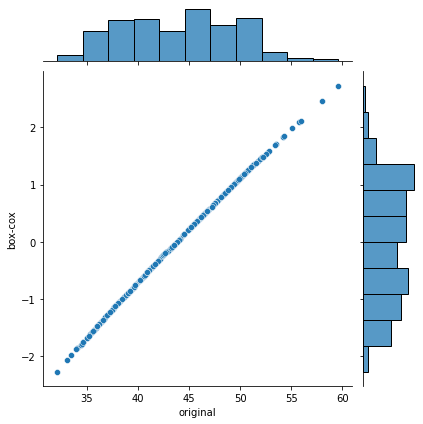

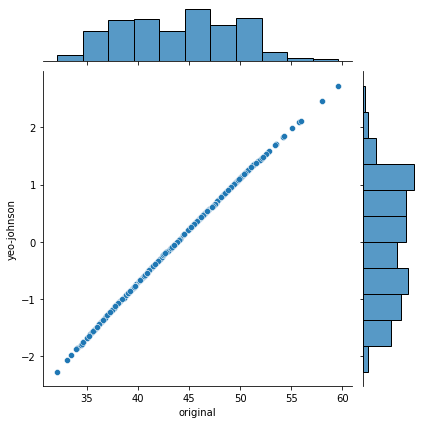

In [4]:
import matplotlib.pyplot as plt

sns.jointplot(x="original", y="box-cox", data=data, kind="scatter")
sns.jointplot(x="original", y="yeo-johnson", data=data, kind="scatter")
plt.show()

In [5]:
display(
    powerTransformer_boxcox.lambdas_,
    powerTransformer_yeojohnson.lambdas_,
)

array([0.62017395])

array([0.61531059])